In [ ]:
import tensorflow as tf

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('/content/pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2025-03-17 06:04:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.3MB/s    in 5.6s    

2025-03-17 06:04:59 (18.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
import os
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


In [ ]:
for i in os.walk('pizza_steak'):
  print(i)

('pizza_steak', ['test', 'train'], [])
('pizza_steak/test', ['pizza', 'steak'], [])
('pizza_steak/test/pizza', [], ['1183595.jpg', '2944567.jpg', '3261551.jpg', '2782998.jpg', '80750.jpg', '2003290.jpg', '148765.jpg', '1067986.jpg', '3728155.jpg', '1503858.jpg', '998005.jpg', '129666.jpg', '1106738.jpg', '3282393.jpg', '2157510.jpg', '897300.jpg', '3724187.jpg', '1962101.jpg', '3281205.jpg', '1226346.jpg', '2870405.jpg', '2323860.jpg', '1119571.jpg', '2296393.jpg', '540882.jpg', '398812.jpg', '790058.jpg', '1506213.jpg', '2101820.jpg', '53217.jpg', '3376617.jpg', '3049449.jpg', '979933.jpg', '226472.jpg', '343480.jpg', '430904.jpg', '796922.jpg', '40449.jpg', '3785667.jpg', '852436.jpg', '1986128.jpg', '2514438.jpg', '1991586.jpg', '416067.jpg', '3669673.jpg', '3827990.jpg', '380739.jpg', '969461.jpg', '376625.jpg', '3216107.jpg', '153195.jpg', '837119.jpg', '1655630.jpg', '3581181.jpg', '1765727.jpg', '1999711.jpg', '3456604.jpg', '728260.jpg', '300157.jpg', '1686938.jpg', '1512557.jp

In [ ]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [ ]:
os.listdir('pizza_steak/train')

['pizza', 'steak']

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
data_dir

PosixPath('pizza_steak/train')

In [ ]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class # 'pizza_steak/test/pizza'
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (341, 512, 3)


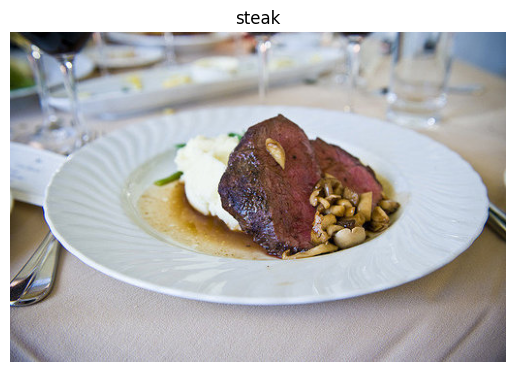

In [ ]:
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class = 'steak')

Image shape: (512, 512, 3)


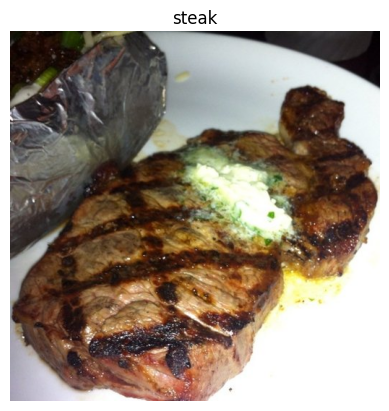

In [ ]:
img = view_random_image(target_dir= 'pizza_steak/train/', target_class='steak')

In [ ]:
img/255.

array([[[0.10196078, 0.0627451 , 0.02745098],
        [0.10196078, 0.0627451 , 0.02745098],
        [0.09411765, 0.05882353, 0.02352941],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.09411765, 0.05490196, 0.01960784],
        [0.09019608, 0.05490196, 0.01960784],
        [0.09411765, 0.05882353, 0.02352941],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.08235294, 0.04705882, 0.01176471],
        [0.08627451, 0.05098039, 0.01568627],
        [0.09411765, 0.05882353, 0.02352941],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471]],

       ...,

       [[0.64705882, 0.63137255, 0.69019608],
        [0.65098039, 0.63529412, 0.69411765],
        [0.65490196, 0

#Fitting Model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = '/content/pizza_steak/train'
valid_dir = '/content/pizza_steak/train'

In [ ]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size=32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = [224, 224, 3]),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model_1.compile(loss = 'binary_crossentropy',
                  optimizer = optimizer,
                  metrics = ['accuracy'])

In [ ]:
history = model_1.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5


ValueError: Cannot take the length of shape with unknown rank.

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model_2.compile(loss='binary_crossentropy',
                optimizer = optimizer,
                metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 195ms/step - accuracy: 0.5156 - loss: 0.6962 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 295ms/step - accuracy: 0.5250 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 149ms/step - accuracy: 0.4963 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 178ms/step - accuracy: 0.5103 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 183ms/step - accuracy: 0.4983 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model_3.compile(loss='binary_crossentropy',
                optimizer = optimizer,
                metrics = ['accuracy'])

In [ ]:
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 206ms/step - accuracy: 0.5645 - loss: 7.6075 - val_accuracy: 0.7747 - val_loss: 1.0334
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.7017 - loss: 1.1895 - val_accuracy: 0.6793 - val_loss: 0.8047
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - accuracy: 0.7600 - loss: 0.5738 - val_accuracy: 0.7367 - val_loss: 0.5591
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 151ms/step - accuracy: 0.7581 - loss: 0.5379 - val_accuracy: 0.7180 - val_loss: 0.7683
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.7782 - loss: 0.6466 - val_accuracy: 0.6313 - val_loss: 1.6330


In [ ]:
len(train_data)

47

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


array([[[ 52,  26,  25],
        [ 50,  24,  23],
        [ 55,  30,  26],
        ...,
        [ 29,  12,   5],
        [ 29,  11,   7],
        [ 30,  12,   8]],

       [[ 50,  24,  23],
        [ 48,  22,  21],
        [ 52,  27,  23],
        ...,
        [ 29,  12,   5],
        [ 29,  11,   7],
        [ 29,  11,   7]],

       [[ 52,  27,  23],
        [ 48,  23,  19],
        [ 47,  22,  18],
        ...,
        [ 30,  13,   6],
        [ 29,  11,   7],
        [ 29,  11,   7]],

       ...,

       [[244, 255, 206],
        [244, 255, 206],
        [245, 255, 205],
        ...,
        [ 41,  32,  27],
        [ 41,  32,  27],
        [ 39,  30,  25]],

       [[245, 254, 207],
        [244, 253, 206],
        [244, 254, 204],
        ...,
        [ 33,  24,  19],
        [ 33,  24,  19],
        [ 32,  23,  18]],

       [[242, 251, 204],
        [242, 251, 204],
        [241, 251, 201],
        ...,
        [ 32,  23,  18],
        [ 31,  22,  17],
        [ 30,  21,  16]]], dtype=uint8)
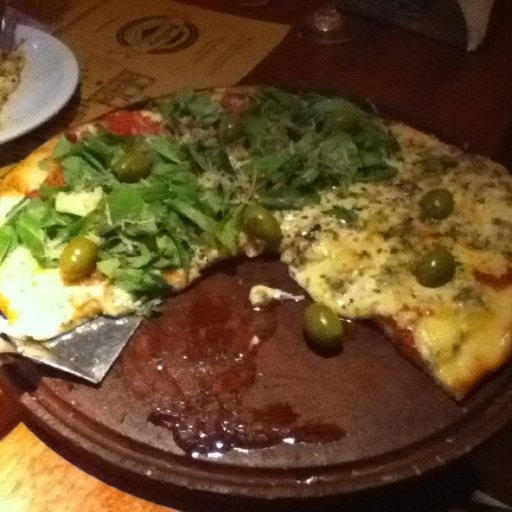

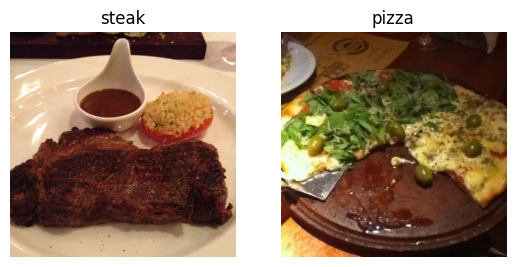

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
view_random_image('pizza_steak/train/', 'pizza')

In [ ]:
!nvidia-smi

Mon Mar 17 06:07:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   59C    P0             27W /   70W |    1690MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(1./255)
test_datagen = ImageDataGenerator(1./255)

train_datagen = train_datagen.flow_from_directory(directory = train_dir,
                                                  batch_size = 32,
                                                  target_size = (224, 224),
                                                  class_mode = 'binary')

test_data = test_datagen.flow_from_directory(directory = valid_dir,
                                                  batch_size = 32,
                                                  target_size = (224, 224),
                                                  class_mode = 'binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [ ]:
images, labels = next(train_data)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides=2,
           padding='valid',
           activation = 'relu',
           input_shape=(224, 224, 3)),
    Conv2D(filters = 10,
           kernel_size = 3,
           strides=2,
           activation = 'relu'),
    Conv2D(filters = 10,
           kernel_size = 3,
           strides=2,
           activation = 'relu'),
    MaxPool2D(2),
    Conv2D(filters = 10,
          kernel_size = 3,
           strides=2,
           activation = 'relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
optimizer = Adam(learning_rate = 1e-3)
model_4.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [ ]:
history_4=model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 212ms/step - accuracy: 0.5502 - loss: 0.6839 - val_accuracy: 0.6860 - val_loss: 0.6308
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 162ms/step - accuracy: 0.6949 - loss: 0.6061 - val_accuracy: 0.7293 - val_loss: 0.5551
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.7334 - loss: 0.5537 - val_accuracy: 0.7547 - val_loss: 0.5265
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 148ms/step - accuracy: 0.7611 - loss: 0.5217 - val_accuracy: 0.7660 - val_loss: 0.5151
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - accuracy: 0.7821 - loss: 0.4654 - val_accuracy: 0.7920 - val_loss: 0.4444


In [ ]:
model_1.evaluate(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.7776 - loss: 74.8075


[72.58489227294922, 0.7826666831970215]

In [ ]:
model_4.evaluate(test_data)

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.7770 - loss: 42.7025


[44.074764251708984, 0.781333327293396]

<Axes: >

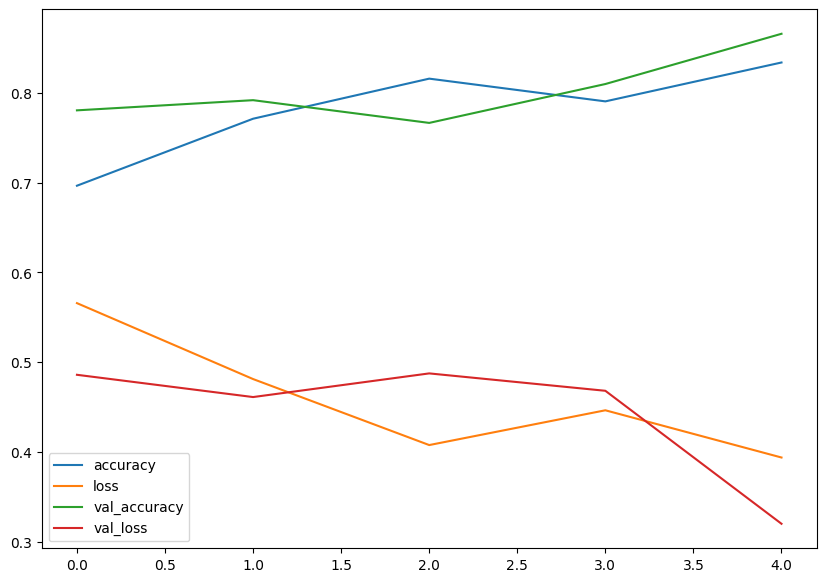

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7))

In [ ]:
history_4.history

{'accuracy': [0.6066666841506958,
  0.7139999866485596,
  0.7386666536331177,
  0.7580000162124634,
  0.7706666588783264],
 'loss': [0.6723513007164001,
  0.5840682983398438,
  0.5496825575828552,
  0.5178651213645935,
  0.4821256101131439],
 'val_accuracy': [0.6859999895095825,
  0.7293333411216736,
  0.7546666860580444,
  0.765999972820282,
  0.7919999957084656],
 'val_loss': [0.6307511925697327,
  0.5550772547721863,
  0.5264735221862793,
  0.5150861144065857,
  0.4444136917591095]}

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  #Plot loss
  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

#Data Augmentation

In [ ]:
# Augmented Dataset
train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range= 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True,
                                             vertical_flip = True)
#Normal Dataset
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
print('Train data augmented: ')
train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                batch_size = 32,
                                                                target_size = (224, 224),
                                                                class_mode = 'binary',
                                                                shuffle = False)
IMG_SIZE = (224,224)
print("Non-Augmented train data: ")
test_data = test_datagen.flow_from_directory(directory = valid_dir,
                                             batch_size = 32,
                                             target_size = IMG_SIZE,
                                             class_mode = 'binary')

Train data augmented: 
Found 1500 images belonging to 2 classes.
Non-Augmented train data: 
Found 1500 images belonging to 2 classes.


In [ ]:
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)

(-0.5, 223.5, 223.5, -0.5)

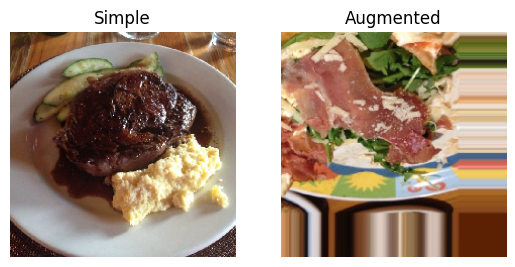

In [ ]:
plt.figure()
random_number = np.random.randint(len(augmented_images))

plt.subplot(1, 2, 1)
plt.imshow(images[random_number])
plt.title('Simple')
plt.axis('Off')

plt.subplot(1, 2, 2)
plt.imshow(augmented_images[random_number])
plt.title('Augmented')
plt.axis('Off')

In [ ]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = (3, 3),
                           padding = 'valid',
                           kernel_initializer = 'he_normal',
                           activation='relu',
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = (3, 3),
                           padding = 'valid',
                           kernel_initializer = 'he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = (3, 3),
                           padding = 'valid',
                           kernel_initializer = 'he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_5.compile(loss='binary_crossentropy',
                optimizer = optimizer,
                metrics = ['accuracy'])

In [ ]:
history_5 = model_5.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 536ms/step - accuracy: 0.6325 - loss: 2.7213 - val_accuracy: 0.5113 - val_loss: 0.8893
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 488ms/step - accuracy: 0.4731 - loss: 0.8529 - val_accuracy: 0.5027 - val_loss: 0.6778
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 673ms/step - accuracy: 0.4677 - loss: 0.6797 - val_accuracy: 0.5173 - val_loss: 0.6603
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 567ms/step - accuracy: 0.5163 - loss: 0.6778 - val_accuracy: 0.5920 - val_loss: 0.6783
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 48s 725ms/step - accuracy: 0.6188 - loss: 0.6700 - val_accuracy: 0.5740 - val_loss: 0.6478


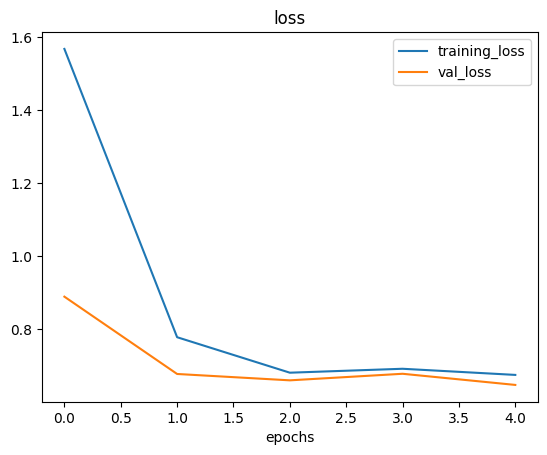

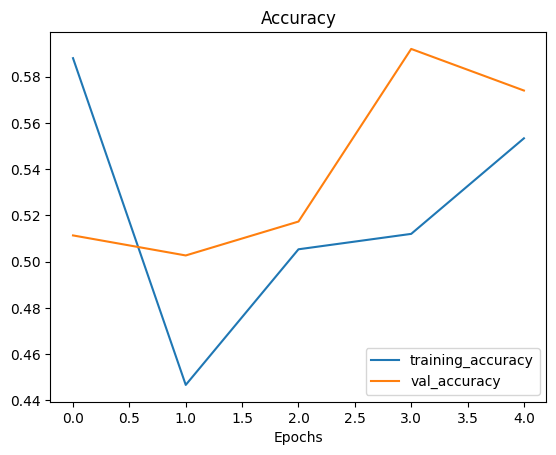

In [ ]:
plot_loss_curves(history_5)

In [ ]:
#Now let's Shuffle data

In [ ]:
print('Augmenteg and Shuffled train data')
train_data_augmented_and_shuffled = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                                batch_size = 32,
                                                                                target_size = IMG_SIZE,
                                                                                class_mode = 'binary',
                                                                                shuffle = True)

Augmenteg and Shuffled train data
Found 1500 images belonging to 2 classes.


In [ ]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = (3, 3),
                           padding = 'valid',
                           kernel_initializer = 'he_normal',
                           activation='relu',
                           input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = (3, 3),
                           padding = 'valid',
                           kernel_initializer = 'he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = (3, 3),
                           padding = 'valid',
                           kernel_initializer = 'he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_6.compile(loss='binary_crossentropy',
                optimizer = optimizer,
                metrics = ['accuracy'])

In [ ]:
history_6 = model_6.fit(train_data_augmented_and_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_and_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 522ms/step - accuracy: 0.5334 - loss: 0.6910 - val_accuracy: 0.7707 - val_loss: 0.5162
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 485ms/step - accuracy: 0.7281 - loss: 0.5498 - val_accuracy: 0.8140 - val_loss: 0.4410
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 474ms/step - accuracy: 0.7471 - loss: 0.5126 - val_accuracy: 0.7927 - val_loss: 0.4779
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 48s 625ms/step - accuracy: 0.8059 - loss: 0.4573 - val_accuracy: 0.8313 - val_loss: 0.3890
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 525ms/step - accuracy: 0.7795 - loss: 0.4698 - val_accuracy: 0.7740 - val_loss: 0.4680


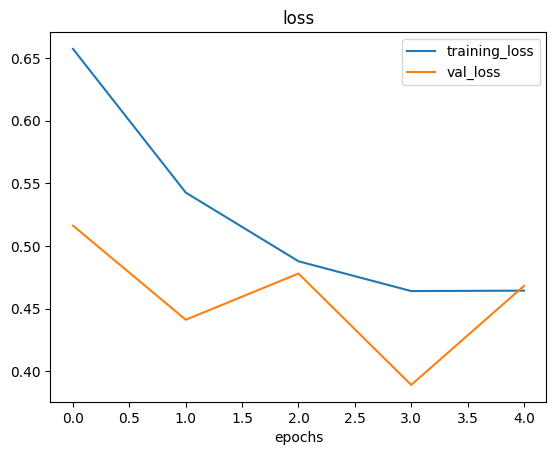

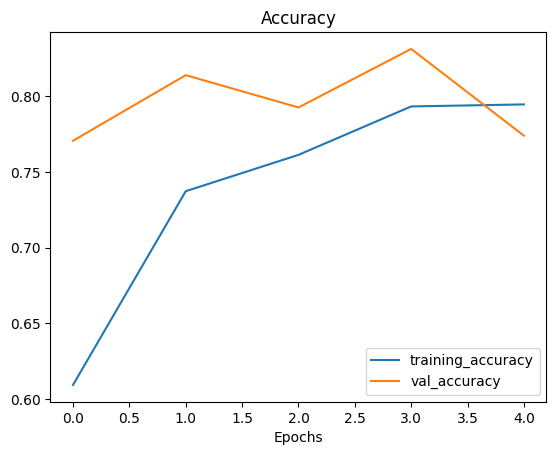

In [ ]:
plot_loss_curves(history_6)

In [ ]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')

--2025-03-17 06:19:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2025-03-17 06:19:16 (219 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



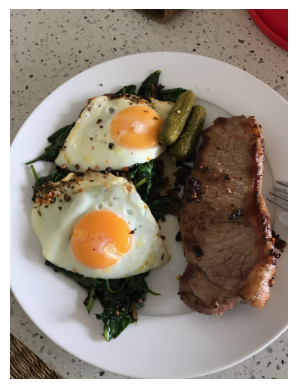

In [ ]:
plt.imshow(steak)
plt.axis(False)
plt.show()

In [ ]:
steak_norm = ImageDataGenerator(rescale = 1/255.)

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
def load_and_prep_image(filename, img_shape = 224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [ ]:
(load_and_prep_image('/content/03-steak.jpeg').shape)

TensorShape([224, 224, 3])

In [ ]:
steak = load_and_prep_image('03-steak.jpeg')
pred = model_6.predict(tf.expand_dims(steak, axis = 0)).round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


In [ ]:
pred

array([[1.]], dtype=float32)

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


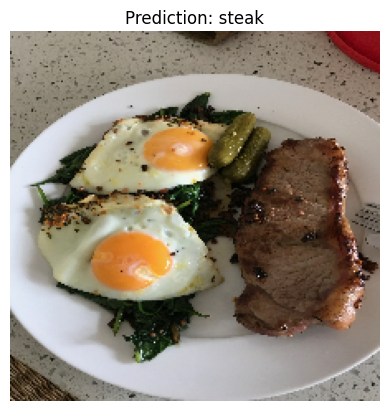

In [ ]:
pred_and_plot(model_6, '03-steak.jpeg')

In [ ]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pizza = mpimg.imread('03-pizza-dad.jpeg')

--2025-03-17 06:19:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2025-03-17 06:19:19 (195 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


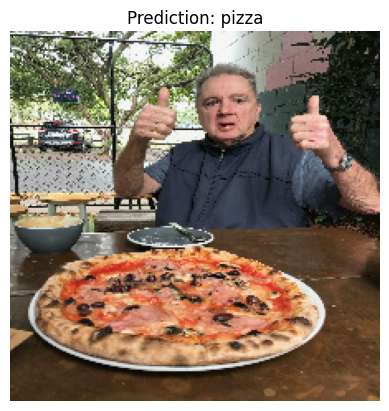

In [ ]:
pred_and_plot(model_6, '/content/03-pizza-dad.jpeg')

#10 Food Classes

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

import zipfile
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

import os
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

--2025-03-17 06:19:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  22.4MB/s    in 24s     

2025-03-17 06:19:44 (20.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/test.
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream.
There are 0 directories and 250 images in 10_food_classes_all_data/test/c

In [ ]:
train_dir = '/content/10_food_classes_all_data/train/'
test_dir = '/content/10_food_classes_all_data/test/'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range= 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True,
                                             vertical_flip = True)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
IMG_SIZE = (224, 224)
batch_size = 32

In [ ]:
augmented_train = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                              target_size = IMG_SIZE,
                                                              class_mode = 'categorical',
                                                              batch_size = batch_size)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = IMG_SIZE,
                                             class_mode = 'categorical',
                                             batch_size = batch_size)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
images, labels = next(augmented_train)

In [ ]:
images.shape

(32, 224, 224, 3)

In [ ]:
labels.shape

(32, 10)

(-0.5, 223.5, 223.5, -0.5)

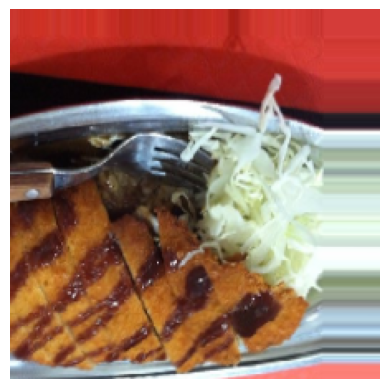

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(images[np.random.randint(len(images))])
plt.axis(False)

In [ ]:
model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = (3, 3),
                           padding = 'valid',
                           kernel_initializer = 'he_normal',
                           activation='relu',
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = (3, 3),
                           padding = 'valid',
                           kernel_initializer = 'he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = (3, 3),
                           padding = 'valid',
                           kernel_initializer = 'he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')

])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_7.compile(loss='categorical_crossentropy',
                optimizer = optimizer,
                metrics = ['accuracy'])

In [ ]:
images.shape

(32, 224, 224, 3)

In [ ]:
tf.expand_dims(labels, axis=0)

<tf.Tensor: shape=(1, 32, 10), dtype=float32, numpy=
array([[[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('MyCheckpiont.weights.h5',
                                                   save_weights_only = True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 10,
                                                     restore_best_weights = True)

In [ ]:
history_7 = model_7.fit(augmented_train,
                        epochs = 5,
                        steps_per_epoch = len(augmented_train),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks = (checkpoint_cb, early_stopping_cb))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 114s 486ms/step - accuracy: 0.2662 - loss: 2.0613 - val_accuracy: 0.3108 - val_loss: 1.9414
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 152s 648ms/step - accuracy: 0.2845 - loss: 2.0256 - val_accuracy: 0.3564 - val_loss: 1.8265
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 173s 524ms/step - accuracy: 0.3223 - loss: 1.9430 - val_accuracy: 0.3828 - val_loss: 1.7808
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 131s 557ms/step - accuracy: 0.3268 - loss: 1.9310 - val_accuracy: 0.3508 - val_loss: 1.9089
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 128s 546ms/step - accuracy: 0.3338 - loss: 1.9132 - val_accuracy: 0.3892 - val_loss: 1.7584


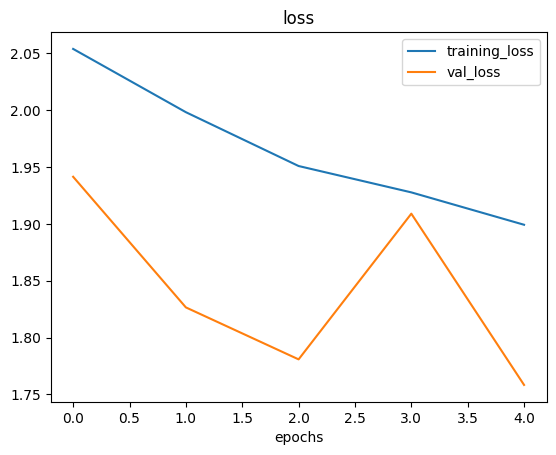

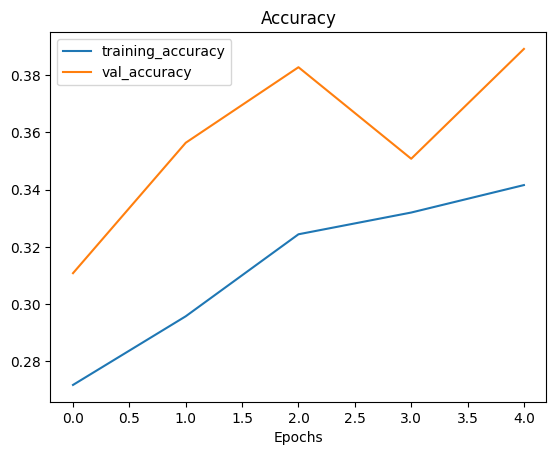

In [ ]:
plot_loss_curves(history_7)

In [ ]:
!wget https://thekittchen.com/wp-content/uploads/2016/04/PRE-Brand-Steak-and-Blue-Cheese-Pizza-2.jpg

--2025-03-17 06:36:49--  https://thekittchen.com/wp-content/uploads/2016/04/PRE-Brand-Steak-and-Blue-Cheese-Pizza-2.jpg
Resolving thekittchen.com (thekittchen.com)... 104.18.37.69, 172.64.150.187, 2606:4700:4400::6812:2545, ...
Connecting to thekittchen.com (thekittchen.com)|104.18.37.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 343936 (336K) [image/jpeg]
Saving to: ‘PRE-Brand-Steak-and-Blue-Cheese-Pizza-2.jpg.1’

PRE-Brand-Steak-and 100%[===================>] 335.88K  --.-KB/s    in 0.005s  

2025-03-17 06:36:49 (72.3 MB/s) - ‘PRE-Brand-Steak-and-Blue-Cheese-Pizza-2.jpg.1’ saved [343936/343936]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


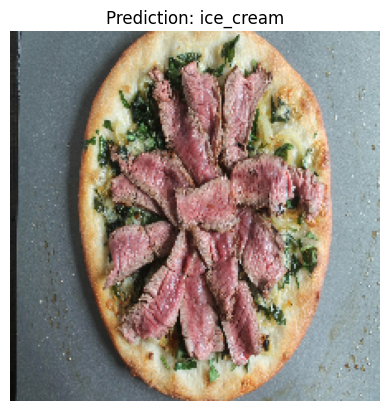

In [ ]:
pred_and_plot(model_7, '/content/PRE-Brand-Steak-and-Blue-Cheese-Pizza-2.jpg')

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  img = load_and_pred_image(filename)
  pred = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[np.argmax(tf.round(pred))]

  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

#Another Version of 10 Food classes

In [ ]:
import pathlib
import  numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape: (306, 512, 3)


array([[[109,  55,  19],
        [109,  55,  19],
        [109,  57,  20],
        ...,
        [  4,   1,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[109,  57,  20],
        [108,  56,  19],
        [109,  57,  20],
        ...,
        [  7,   6,   1],
        [  4,   5,   0],
        [  0,   1,   0]],

       [[107,  57,  20],
        [106,  56,  19],
        [107,  57,  20],
        ...,
        [  0,   2,   1],
        [  0,   3,   4],
        [  0,   4,   4]],

       ...,

       [[  7,   1,   1],
        [  7,   1,   1],
        [  9,   0,   1],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 11,   1,   0],
        [ 11,   1,   0],
        [ 11,   1,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 12,   0,   0],
        [ 12,   0,   0],
        [ 12,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
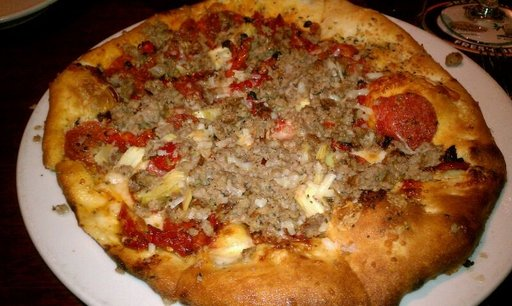

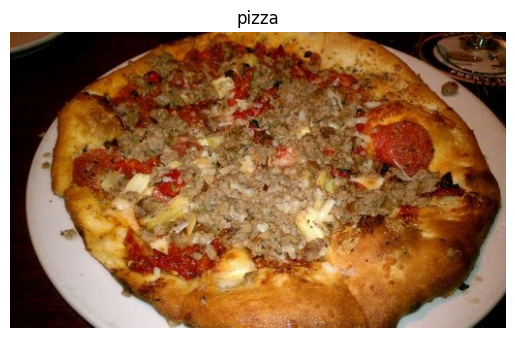

In [ ]:
import random
view_random_image(target_dir = train_dir, target_class = random.choice(class_names))

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = test_datagen.flow_from_directory(train_dir,
                                              target_size = (224, 224),
                                              batch_size = 32)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
model_1_categorical = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = (3, 3),
                           padding = 'valid',
                           kernel_initializer = 'he_normal',
                           activation='relu',
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = (3, 3),
                           padding = 'valid',
                           kernel_initializer = 'he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = (3, 3),
                           padding = 'valid',
                           kernel_initializer = 'he_normal',
                           activation='relu',
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = (3, 3),
                           padding = 'valid',
                           kernel_initializer = 'he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model_1_categorical.compile(loss='categorical_crossentropy',
                            optimizer = optimizer,
                            metrics=['accuracy'])

In [ ]:
model_1_categorical.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 141ms/step - accuracy: 0.1814 - loss: 2.7600 - val_accuracy: 0.3376 - val_loss: 1.9238
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 116ms/step - accuracy: 0.3952 - loss: 1.7767 - val_accuracy: 0.3528 - val_loss: 1.8716
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 130ms/step - accuracy: 0.5623 - loss: 1.3397 - val_accuracy: 0.3248 - val_loss: 2.0513
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - accuracy: 0.7601 - loss: 0.7930 - val_accuracy: 0.2912 - val_loss: 2.4242
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 138ms/step - accuracy: 0.8972 - loss: 0.3696 - val_accuracy: 0.2836 - val_loss: 3.1075


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
ckp = ModelCheckpoint('MyCheckpoint.weights.h5', save_weights_only = True)
es = EarlyStopping(restore_best_weights=True,
                    patience=1,
                    monitor='loss',
                    #mode='min
                    )

In [ ]:
model_1_categorical_history = model_1_categorical.fit(train_data,
                                                      epochs = 5,
                                                      steps_per_epoch = len(train_data),
                                                      validation_steps = len(test_data),
                                                      callbacks = [es, ckp])

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9729 - loss: 0.1327
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9816 - loss: 0.0755
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.9946 - loss: 0.0312
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - accuracy: 0.9951 - loss: 0.0228
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 86ms/step - accuracy: 0.9818 - loss: 0.0662


In [ ]:
model_1_categorical_history

In [ ]:
model_2_categorical = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = (3, 3),
                           padding = 'valid',
                           kernel_initializer = 'he_normal',
                           activation='relu',
                           strides = (2, 2),
                           input_shape = (224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = (3, 3),
                           padding = 'valid',
                           kernel_initializer = 'he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = (3, 3),
                           padding = 'valid',
                           kernel_initializer = 'he_normal',
                           activation='relu',
                           strides = (2, 2),
                           input_shape = (224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = (3, 3),
                           padding = 'valid',
                           kernel_initializer = 'he_normal',
                           activation='relu',
                           strides = (2, 2)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = 'softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model_2_categorical.compile(loss='categorical_crossentropy',
                            optimizer = optimizer,
                            metrics=['accuracy'])

In [ ]:
model_2_categorical_history = model_2_categorical.fit(train_data,
                                                   epochs = 5,
                                                   steps_per_epoch=len(train_data),
                                                   validation_data = test_data,
                                                   validation_steps = len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 153ms/step - accuracy: 0.1201 - loss: 3.4983 - val_accuracy: 0.1756 - val_loss: 2.2112
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 158ms/step - accuracy: 0.1790 - loss: 2.2440 - val_accuracy: 0.2528 - val_loss: 2.0772
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 39s 166ms/step - accuracy: 0.2364 - loss: 2.1243 - val_accuracy: 0.3036 - val_loss: 1.9989
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 54s 220ms/step - accuracy: 0.2777 - loss: 2.0369 - val_accuracy: 0.3264 - val_loss: 1.9299
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 57s 114ms/step - accuracy: 0.3032 - loss: 1.9748 - val_accuracy: 0.3500 - val_loss: 1.8573


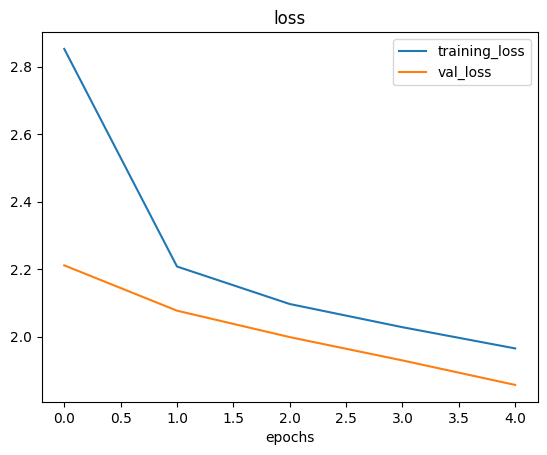

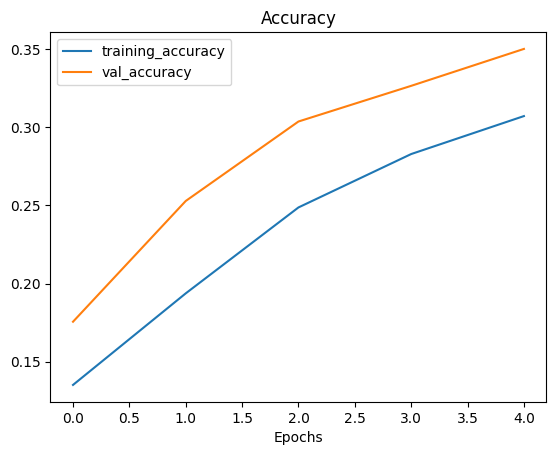

In [ ]:
plot_loss_curves(model_2_categorical_history)

In [ ]:
model_2_categorical.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.3452 - loss: 1.8391


[1.8573071956634521, 0.3499999940395355]

In [ ]:
model_2_copy = tf.keras.models.clone_model(model_2_categorical)

In [ ]:
model_2_copy.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 111, 111, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 111, 111, 10)        │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 54, 54, 10)          │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 26, 26, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 26, 26, 10)          │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 12, 12, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 6, 6, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 360)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 360)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           3,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,740 (26.33 KB)

 Trainable params: 6,680 (26.09 KB)

 Non-trainable params: 60 (240.00 B)

In [ ]:
train_augmented_datagen = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True,
                                             vertical_flip = True)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
train_data_augmented = train_augmented_datagen.flow_from_directory(train_dir,
                                                                  target_size = (224, 224),
                                                                  class_mode = 'categorical',
                                                                  batch_size = 32)
test_data = test_datagen.flow_from_directory(train_dir,
                                             target_size = (224, 224),
                                             class_mode = 'categorical',
                                             batch_size = 32)

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model_2_copy.compile(loss='categorical_crossentropy',
                            optimizer = optimizer,
                            metrics=['accuracy'])

In [ ]:
model_2_copy_history = model_2_copy.fit(train_data,
                                        epochs = 5,
                                        steps_per_epoch=len(train_data),
                                        validation_data = test_data,
                                        validation_steps = len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.1144 - loss: 3.4522

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 174ms/step - accuracy: 0.1144 - loss: 3.4496 - val_accuracy: 0.1627 - val_loss: 2.2472
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 78s 167ms/step - accuracy: 0.1547 - loss: 2.2738 - val_accuracy: 0.2300 - val_loss: 2.1569
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 158ms/step - accuracy: 0.1995 - loss: 2.1729 - val_accuracy: 0.2663 - val_loss: 2.0525
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 168ms/step - accuracy: 0.2440 - loss: 2.0863 - val_accuracy: 0.2739 - val_loss: 2.0330
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 161ms/step - accuracy: 0.2553 - loss: 2.0583 - val_accuracy: 0.3193 - val_loss: 1.9331


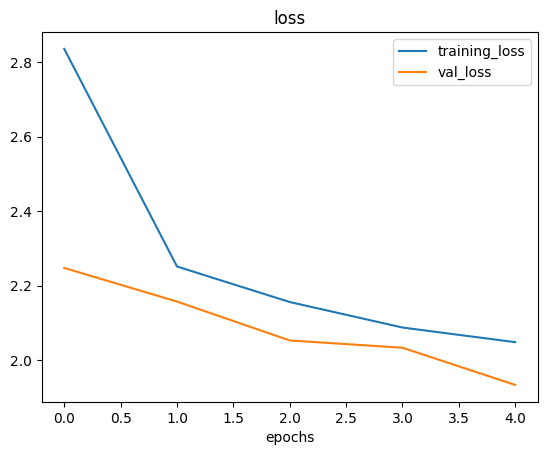

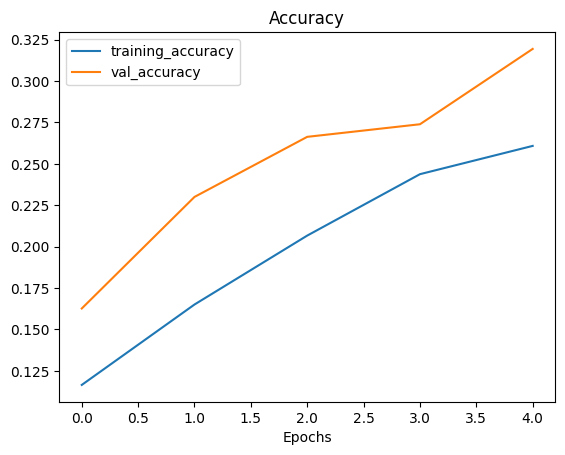

In [ ]:
plot_loss_curves(model_2_copy_history)

In [ ]:
# pred_and_plot fpr multiclass classification

def pred_and_plot(model, filenime, class_names = class_names):
  img = load_and_prep_image(filenime)
  pred = model.predict(tf.expand_dims(img, axis = 0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.math.argmax(pred, axis = 1)]
  else:
    pred_class = class_names[tf,int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2025-03-17 07:24:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.01s   

2025-03-17 07:24:46 (296 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2025-03-17 07:24:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting resp

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


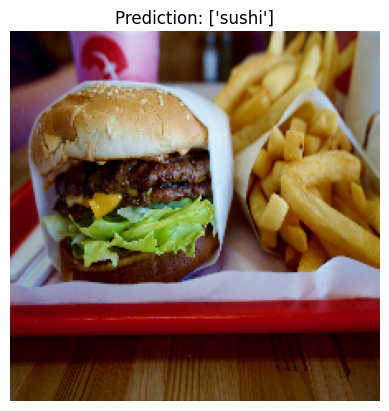

In [ ]:
pred_and_plot(model = model_2_categorical,
              filenime = '03-hamburger.jpeg',
              class_names = (class_names))

In [ ]:
model_2_categorical.save('Categorical Model.h5')